In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

# Data has 311 reported homeless people for complaint type - Homeless encampment as well as homeless people reach, can the data be duplicate in both entries, our assumption is that its not!!

In [11]:
homeless2016 = pd.read_csv("../Data_vys217/DHS/311_Service_Requests/311_Service_Requests_from_2016.csv",
                           usecols=['Created Date', 'Incident Zip'])

In [12]:
homeless2015new = pd.read_csv("../Data_vys217/DHS/311_Service_Requests/311_Service_Requests_from_2015_nyc_filter.csv",
                               usecols=['Created Date', 'Incident Zip'])

In [13]:
homeless2016['Created Date'] = pd.to_datetime(homeless2016['Created Date'])
homeless2015new['Created Date'] = pd.to_datetime(homeless2015new['Created Date'])

In [14]:
homeless2015new.head()

,Created Date,Incident Zip
0,2015-06-03 09:38:31,10009.0
1,2015-06-30 08:03:05,10001.0
2,2015-08-02 08:41:08,10009.0
3,2015-11-29 12:38:41,10009.0
4,2015-03-31 08:07:24,10019.0


In [15]:
homeless2015new['Created Date'].describe()

count                   11318
unique                  11317
top       2015-05-04 21:55:20
freq                        2
first     2015-01-01 04:29:10
last      2015-12-30 21:11:49
Name: Created Date, dtype: object

In [16]:
homeless2016['Created Date'].describe()

count                   47678
unique                  47561
top       2016-08-06 08:31:48
freq                        3
first     2016-01-01 02:26:46
last      2016-11-29 01:47:42
Name: Created Date, dtype: object

# Number of reported homeless people on streets has increased 4 times in 2016 from 2015

In [17]:
homeless2015new.drop(['Created Date'], axis=1, inplace=True)
homeless2016.drop(['Created Date'], axis=1, inplace=True)

In [18]:
print homeless2015new.shape
print homeless2016.shape

(11318, 1)
(47678, 1)


In [19]:
homeless2015new.dropna(inplace=True)
homeless2016.dropna(inplace=True)

In [20]:
print homeless2015new.shape
print homeless2016.shape

(11101, 1)
(46837, 1)


In [25]:
#Merge 2015 and 16 data
homeless15_16 = pd.concat([homeless2015new, homeless2016], ignore_index= True)

In [22]:
homless_counts = homeless15_16['Incident Zip'].value_counts()

In [23]:
homless_counts = pd.DataFrame(homless_counts)

In [26]:
homless_counts.reset_index(inplace=True)

In [35]:
homless_counts.columns

Index([u'index', u'Incident Zip'], dtype='object')

In [38]:
homless_counts.rename(columns={'index':'zip_code', 'Incident Zip':'homeless_count'}, inplace=True)

In [40]:
homless_counts.head()

,zip_code,homeless_count
0,10003.0,4367
1,10036.0,3507
2,10001.0,3462
3,10023.0,3311
4,10019.0,3004


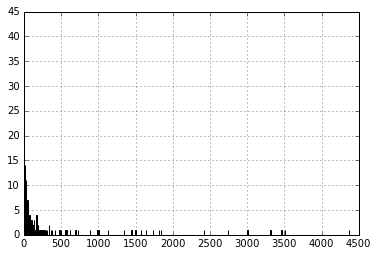

In [77]:
homless_counts.homeless_count.hist(bins=1000)

# Get the crimes count data

In [47]:
crimes_counts = pd.read_csv("C:\Users\Vishwajeet\Documents\Python Scripts\Homeless\VYS217\Data_vys217\Crime\intermittent\crimes_counts.csv")

In [49]:
crimes_counts.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [51]:
crimes_counts.

,zip_code,crime_count
0,10001,4404
1,10002,4145
2,10003,3397
3,10004,453
4,10005,285


# Merge the homeless and crime data

In [71]:
homeless_crimes = pd.merge(crimes_counts, homless_counts, on='zip_code', how='inner')

In [72]:
homeless_crimes = homeless_crimes[homeless_crimes.zip_code > 10000]

In [73]:
homeless_crimes

,zip_code,crime_count,homeless_count
0,10001,4404,3462
1,10002,4145,692
2,10003,3397,4367
3,10004,453,294
4,10005,285,341
5,10006,242,167
6,10007,985,361
7,10009,2408,1442
8,10010,1530,992
9,10011,3185,2744


# Pearson's correlation coefficient function of pandas

In [119]:
homeless_crimes.corr()

,zip_code,crime_count,homeless_count
zip_code,1.000000,0.073128,-0.358332
crime_count,0.073128,1.000000,0.286863
homeless_count,-0.358332,0.286863,1.000000


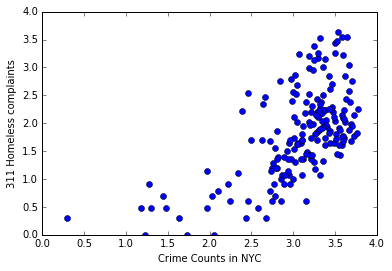

In [105]:
plt.plot(np.log10(homeless_crimes.crime_count),np.log10(homeless_crimes.homeless_count),'o')
plt.xlabel('Crime Counts in NYC')
plt.ylabel('311 Homeless complaints')

In [114]:
homeless_crime_log =pd.DataFrame()
homeless_crime_log['log_homeless'] = np.log10(homeless_crimes.homeless_count)
homeless_crime_log['log_crimes'] = np.log10(homeless_crimes.crime_count)
homeless_crime_log['log_crimes_2'] = (np.log10(homeless_crimes.crime_count))**2

# Pearson's correlation coefficient function of pandas for log data

In [115]:
homeless_crime_log.corr()

,log_homeless,log_crimes,log_crimes_2
log_homeless,1.000000,0.626110,0.633303
log_crimes,0.626110,1.000000,0.982467
log_crimes_2,0.633303,0.982467,1.000000


In [118]:
lm = smf.ols(formula= 'log_homeless ~ log_crimes', data= homeless_crime_log).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:           log_homeless   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2016   Prob (F-statistic):                nan
Time:                        15:31:47   Log-Likelihood:                    nan
No. Observations:                 213   AIC:                               nan
Df Residuals:                     213   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        n